### For the data With duplicates

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import warnings

# Suppress TensorFlow warnings (or any other unwanted warnings)
warnings.filterwarnings('ignore')

# Define the paths to the training and testing data
train_dir = r'C:\Users\HP\Downloads\melanoma_cancer_dataset\train'
test_dir =  r'C:\Users\HP\Downloads\melanoma_cancer_dataset\test'

# Create ImageDataGenerators for loading images without augmentation
train_datagen = ImageDataGenerator(rescale=1./255)  # Only rescale the images

test_datagen = ImageDataGenerator(rescale=1./255)

# Load the training and testing datasets
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),  # Resize the images
    batch_size=32,
    class_mode='binary'  # Since it's a binary classification (benign vs malignant)
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)


Found 9605 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [2]:
from tensorflow.keras import layers, models

# Build a simple CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary classification (benign vs malignant)
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [3]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,
    validation_data=test_generator,
    validation_steps=test_generator.samples // test_generator.batch_size
)


Epoch 1/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 199s 652ms/step - accuracy: 0.6966 - loss: 0.6349 - val_accuracy: 0.8649 - val_loss: 0.3149
Epoch 2/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step - accuracy: 0.8750 - loss: 0.2747 - val_accuracy: 0.7500 - val_loss: 0.4386
Epoch 3/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 131s 438ms/step - accuracy: 0.8616 - loss: 0.3126 - val_accuracy: 0.8881 - val_loss: 0.2614
Epoch 4/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 320us/step - accuracy: 0.9688 - loss: 0.1468 - val_accuracy: 1.0000 - val_loss: 0.0758
Epoch 5/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 139s 464ms/step - accuracy: 0.8889 - loss: 0.2615 - val_accuracy: 0.8911 - val_loss: 0.2402
Epoch 6/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 293us/step - accuracy: 0.8750 - loss: 0.2028 - val_accuracy: 1.0000 - val_loss: 0.1704
Epoch 7/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 138s 461ms/step - accuracy: 0.8963 - loss: 0.2432 - val_accuracy: 0.8962 - val_loss: 0.2965
Epoch 8/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 256us/step - accuracy: 0.9062 - loss: 0

In [4]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test accuracy: {test_acc}")

# Make predictions (example with one image)
import numpy as np
from tensorflow.keras.preprocessing import image

img_path = r'C:\Users\HP\Downloads\melanoma_cancer_dataset_without_duplicates\test\benign\melanoma_9975.jpg'
img = image.load_img(img_path, target_size=(150, 150))
img_array = image.img_to_array(img) / 255.0  # Normalizing the image
img_array = np.expand_dims(img_array, axis=0)

prediction = model.predict(img_array)
print("Prediction (0 for benign, 1 for malignant):", prediction[0][0])


32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - accuracy: 0.9027 - loss: 0.2221
Test accuracy: 0.8970000147819519
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
Prediction (0 for benign, 1 for malignant): 0.011273907


32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 76ms/step


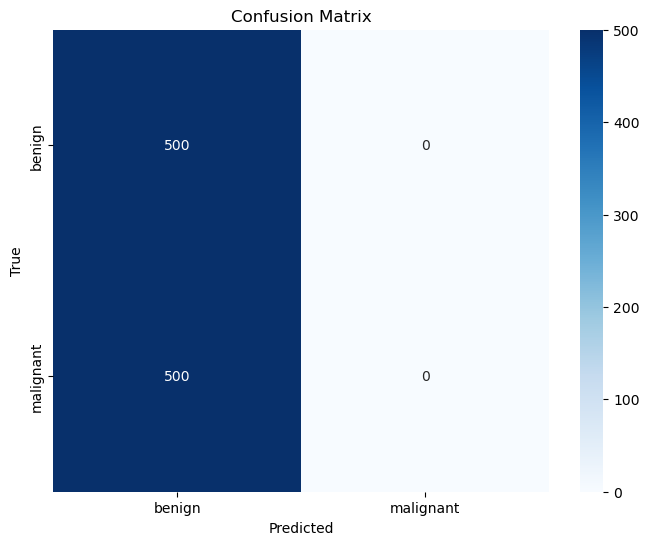

Classification Report:
              precision    recall  f1-score   support

      benign       0.50      1.00      0.67       500
   malignant       0.00      0.00      0.00       500

    accuracy                           0.50      1000
   macro avg       0.25      0.50      0.33      1000
weighted avg       0.25      0.50      0.33      1000



In [6]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Predict the classes for the test data
predictions = model.predict(test_generator, steps=len(test_generator), verbose=1)

# Step 2: Convert predictions to class labels (assuming predictions are probabilities from softmax)
predicted_classes = np.argmax(predictions, axis=1)

# Step 3: Get true class labels
true_classes = test_generator.classes

# Step 4: Ensure that both arrays (true_classes and predicted_classes) have the same length
# If necessary, slice predictions or true_classes to match the length
if len(true_classes) != len(predicted_classes):
    true_classes = true_classes[:len(predicted_classes)]

# Step 5: Generate confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Step 6: Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Step 7: Print the classification report
print('Classification Report:')
print(classification_report(true_classes, predicted_classes, target_names=test_generator.class_indices.keys()))


## For  the data without duplicates

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the paths to the training and testing data
train_dir = r'C:\Users\HP\Downloads\melanoma_cancer_dataset_without_duplicates\train'
test_dir =  r'C:\Users\HP\Downloads\melanoma_cancer_dataset_without_duplicates\test'

# Create ImageDataGenerators for loading images without augmentation
train_datagen = ImageDataGenerator(rescale=1./255)  # Only rescale the images

test_datagen = ImageDataGenerator(rescale=1./255)

# Load the training and testing datasets
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),  # Resize the images
    batch_size=32,
    class_mode='binary'  # Since it's a binary classification (benign vs malignant)
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)


Found 9579 images belonging to 2 classes.
Found 999 images belonging to 2 classes.


In [8]:
from tensorflow.keras import layers, models

# Build a simple CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary classification (benign vs malignant)
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [9]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,
    validation_data=test_generator,
    validation_steps=test_generator.samples // test_generator.batch_size
)


Epoch 1/10
299/299 ━━━━━━━━━━━━━━━━━━━━ 194s 642ms/step - accuracy: 0.7395 - loss: 0.5564 - val_accuracy: 0.8760 - val_loss: 0.2903
Epoch 2/10
299/299 ━━━━━━━━━━━━━━━━━━━━ 0s 255us/step - accuracy: 0.9062 - loss: 0.2367 - val_accuracy: 1.0000 - val_loss: 0.1572
Epoch 3/10
299/299 ━━━━━━━━━━━━━━━━━━━━ 131s 438ms/step - accuracy: 0.8738 - loss: 0.3001 - val_accuracy: 0.8891 - val_loss: 0.2683
Epoch 4/10
299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 321us/step - accuracy: 0.9062 - loss: 0.1506 - val_accuracy: 1.0000 - val_loss: 0.1087
Epoch 5/10
299/299 ━━━━━━━━━━━━━━━━━━━━ 134s 448ms/step - accuracy: 0.8896 - loss: 0.2686 - val_accuracy: 0.8780 - val_loss: 0.3448
Epoch 6/10
299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 259us/step - accuracy: 0.8438 - loss: 0.2605 - val_accuracy: 0.8571 - val_loss: 0.5247
Epoch 7/10
299/299 ━━━━━━━━━━━━━━━━━━━━ 132s 441ms/step - accuracy: 0.8876 - loss: 0.2816 - val_accuracy: 0.8790 - val_loss: 0.2722
Epoch 8/10
299/299 ━━━━━━━━━━━━━━━━━━━━ 0s 247us/step - accuracy: 0.8750 - loss: 0

In [10]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test accuracy: {test_acc}")

# Make predictions (example with one image)
import numpy as np
from tensorflow.keras.preprocessing import image

img_path = r'C:\Users\HP\Downloads\melanoma_cancer_dataset_without_duplicates\test\malignant\melanoma_10578.jpg'
img = image.load_img(img_path, target_size=(150, 150))
img_array = image.img_to_array(img) / 255.0  # Normalizing the image
img_array = np.expand_dims(img_array, axis=0)

prediction = model.predict(img_array)
print("Prediction (0 for benign, 1 for malignant):", prediction[0][0])


32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 76ms/step - accuracy: 0.8949 - loss: 0.2608
Test accuracy: 0.9039039015769958
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
Prediction (0 for benign, 1 for malignant): 1.0


32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 80ms/step


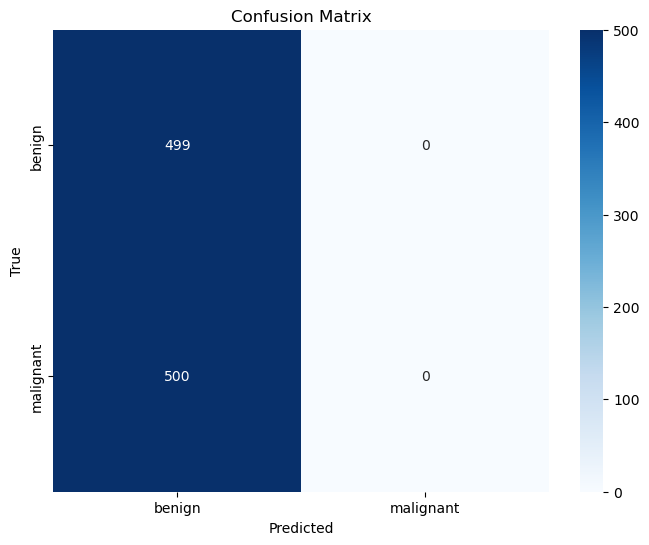

Classification Report:
              precision    recall  f1-score   support

      benign       0.50      1.00      0.67       499
   malignant       0.00      0.00      0.00       500

    accuracy                           0.50       999
   macro avg       0.25      0.50      0.33       999
weighted avg       0.25      0.50      0.33       999



In [11]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Predict the classes for the test data
predictions = model.predict(test_generator, steps=len(test_generator), verbose=1)

# Step 2: Convert predictions to class labels (assuming predictions are probabilities from softmax)
predicted_classes = np.argmax(predictions, axis=1)

# Step 3: Get true class labels
true_classes = test_generator.classes

# Step 4: Ensure that both arrays (true_classes and predicted_classes) have the same length
# If necessary, slice predictions or true_classes to match the length
if len(true_classes) != len(predicted_classes):
    true_classes = true_classes[:len(predicted_classes)]

# Step 5: Generate confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Step 6: Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Step 7: Print the classification report
print('Classification Report:')
print(classification_report(true_classes, predicted_classes, target_names=test_generator.class_indices.keys()))


## Applying Grey Scale images as a input for the input to CNN model

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the paths to the training and testing data
train_dir = r'C:\Users\HP\Downloads\Grey_images\Train'
test_dir =  r'C:\Users\HP\Downloads\Grey_images\Test'

# Create ImageDataGenerators for loading images without augmentation
train_datagen = ImageDataGenerator(rescale=1./255)  # Only rescale the images

test_datagen = ImageDataGenerator(rescale=1./255)

# Load the training and testing datasets
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),  # Resize the images
    batch_size=32,
    class_mode='binary'  # Since it's a binary classification (benign vs malignant)
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)


Found 9579 images belonging to 2 classes.
Found 999 images belonging to 2 classes.


## Building the CNN Model

In [13]:
from tensorflow.keras import layers, models

# Build a simple CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary classification (benign vs malignant)
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


### Model Training (Grey Images)

In [14]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,
    validation_data=test_generator,
    validation_steps=test_generator.samples // test_generator.batch_size
)


Epoch 1/10
299/299 ━━━━━━━━━━━━━━━━━━━━ 194s 641ms/step - accuracy: 0.7226 - loss: 0.5715 - val_accuracy: 0.8710 - val_loss: 0.2946
Epoch 2/10
299/299 ━━━━━━━━━━━━━━━━━━━━ 0s 217us/step - accuracy: 0.8125 - loss: 0.2834 - val_accuracy: 0.7143 - val_loss: 0.5686
Epoch 3/10
299/299 ━━━━━━━━━━━━━━━━━━━━ 128s 427ms/step - accuracy: 0.8507 - loss: 0.3244 - val_accuracy: 0.8468 - val_loss: 0.3002
Epoch 4/10
299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 400us/step - accuracy: 0.7188 - loss: 0.4511 - val_accuracy: 0.7143 - val_loss: 1.1280
Epoch 5/10
299/299 ━━━━━━━━━━━━━━━━━━━━ 131s 438ms/step - accuracy: 0.8682 - loss: 0.3009 - val_accuracy: 0.8841 - val_loss: 0.2841
Epoch 6/10
299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 254us/step - accuracy: 0.8438 - loss: 0.3165 - val_accuracy: 0.8571 - val_loss: 0.4061
Epoch 7/10
299/299 ━━━━━━━━━━━━━━━━━━━━ 135s 452ms/step - accuracy: 0.8822 - loss: 0.2707 - val_accuracy: 0.8690 - val_loss: 0.3022
Epoch 8/10
299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 242us/step - accuracy: 0.9688 - loss: 0

### Model Evaluation (Grey Scales Images)

In [15]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test accuracy: {test_acc}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - accuracy: 0.8979 - loss: 0.2500
Test accuracy: 0.8938938975334167


### For melanoma classification, RGB images are the better choice. The color information captured in the red, green, and blue channels provides valuable clues that help the model identify melanoma more accurately. Grayscale images, which only capture intensity, may result in a loss of critical color-related features, leading to lower performance in this specific application.

### So, in summary, RGB images are more appropriate for melanoma cancer classification due to the significance of color patterns in identifying malignant lesions.

32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 81ms/step


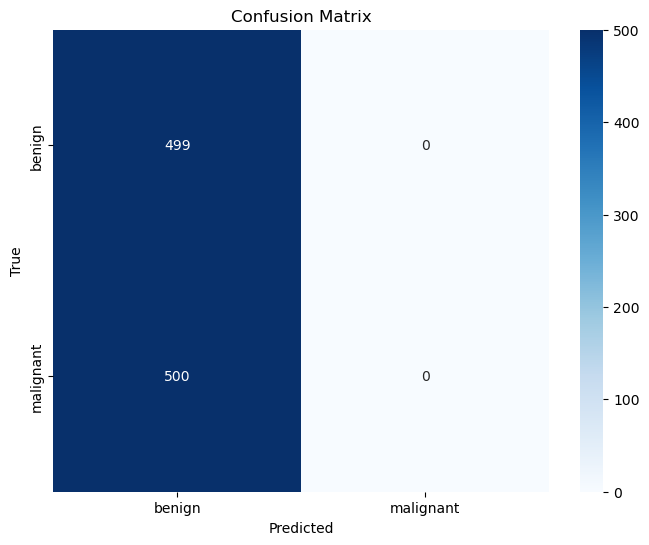

Classification Report:
              precision    recall  f1-score   support

      benign       0.50      1.00      0.67       499
   malignant       0.00      0.00      0.00       500

    accuracy                           0.50       999
   macro avg       0.25      0.50      0.33       999
weighted avg       0.25      0.50      0.33       999



In [16]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Predict the classes for the test data
predictions = model.predict(test_generator, steps=len(test_generator), verbose=1)

# Step 2: Convert predictions to class labels (assuming predictions are probabilities from softmax)
predicted_classes = np.argmax(predictions, axis=1)

# Step 3: Get true class labels
true_classes = test_generator.classes

# Step 4: Ensure that both arrays (true_classes and predicted_classes) have the same length
# If necessary, slice predictions or true_classes to match the length
if len(true_classes) != len(predicted_classes):
    true_classes = true_classes[:len(predicted_classes)]

# Step 5: Generate confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Step 6: Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Step 7: Print the classification report
print('Classification Report:')
print(classification_report(true_classes, predicted_classes, target_names=test_generator.class_indices.keys()))


## Prediction of a Image

In [17]:
import numpy as np
from tensorflow.keras.preprocessing import image

img_path = r'C:\Users\HP\Downloads\melanoma_cancer_dataset_without_duplicates\test\benign\melanoma_9980.jpg'
img = image.load_img(img_path, target_size=(150, 150))
img_array = image.img_to_array(img) / 255.0  # Normalizing the image
img_array = np.expand_dims(img_array, axis=0)

prediction = model.predict(img_array)
print("Prediction (0 for benign, 1 for malignant):", prediction[0][0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
Prediction (0 for benign, 1 for malignant): 0.039864305


### RGB ARgu + Original as input for CNN

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np
import warnings

# Suppress TensorFlow warnings (or any other unwanted warnings)
warnings.filterwarnings('ignore')


# Define the paths to the training and testing data
train_dir = r'C:\Users\HP\Downloads\RGB ARgu+Ori'
test_dir =  r'C:\Users\HP\Downloads\melanoma_cancer_dataset_without_duplicates\test'

# Create ImageDataGenerators for loading images without augmentation
train_datagen = ImageDataGenerator(rescale=1./255)  # Only rescale the images
test_datagen = ImageDataGenerator(rescale=1./255)

# Load the training and testing datasets
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),  # Resize the images
    batch_size=32,
    class_mode='binary'  # Since it's a binary classification (benign vs malignant)
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)



Found 27797 images belonging to 2 classes.
Found 999 images belonging to 2 classes.


In [19]:
# Build a simple CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary classification (benign vs malignant)
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])




In [20]:
# Train the model and save the training history
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,
    validation_data=test_generator,
    validation_steps=test_generator.samples // test_generator.batch_size
)



Epoch 1/10
868/868 ━━━━━━━━━━━━━━━━━━━━ 473s 542ms/step - accuracy: 0.7675 - loss: 0.5197 - val_accuracy: 0.8750 - val_loss: 0.2955
Epoch 2/10
868/868 ━━━━━━━━━━━━━━━━━━━━ 1s 113us/step - accuracy: 0.8750 - loss: 0.2650 - val_accuracy: 0.7143 - val_loss: 0.7161
Epoch 3/10
868/868 ━━━━━━━━━━━━━━━━━━━━ 412s 475ms/step - accuracy: 0.8644 - loss: 0.3170 - val_accuracy: 0.8740 - val_loss: 0.2755
Epoch 4/10
868/868 ━━━━━━━━━━━━━━━━━━━━ 1s 106us/step - accuracy: 0.9062 - loss: 0.2840 - val_accuracy: 0.7143 - val_loss: 0.6634
Epoch 5/10
868/868 ━━━━━━━━━━━━━━━━━━━━ 389s 449ms/step - accuracy: 0.8760 - loss: 0.2945 - val_accuracy: 0.9002 - val_loss: 0.2270
Epoch 6/10
868/868 ━━━━━━━━━━━━━━━━━━━━ 1s 85us/step - accuracy: 0.9375 - loss: 0.1794 - val_accuracy: 1.0000 - val_loss: 0.0708
Epoch 7/10
868/868 ━━━━━━━━━━━━━━━━━━━━ 388s 447ms/step - accuracy: 0.8841 - loss: 0.2737 - val_accuracy: 0.8942 - val_loss: 0.2483
Epoch 8/10
868/868 ━━━━━━━━━━━━━━━━━━━━ 1s 91us/step - accuracy: 0.9688 - loss: 0.1

32/32 - 15s - 453ms/step - accuracy: 0.9069 - loss: 0.2334
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 81ms/step


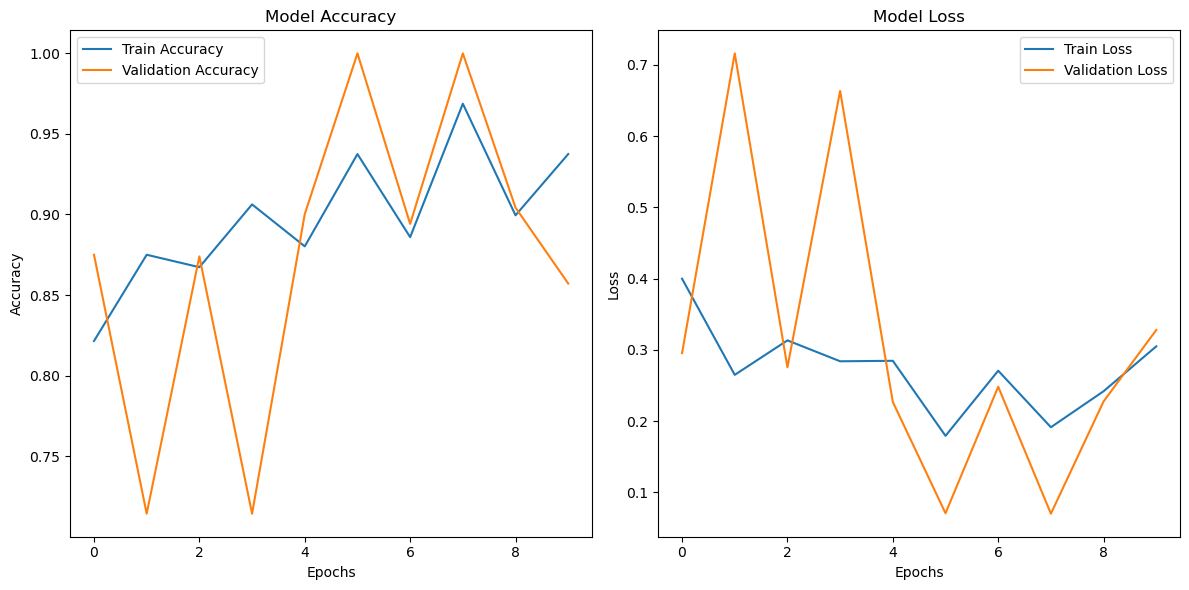

Test Accuracy: 0.9069


In [21]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator, verbose=2)

# Get predictions and true labels
test_generator.reset()  # Reset the generator to avoid issues with predict
y_pred = model.predict(test_generator, verbose=1)
y_pred = (y_pred > 0.5).astype("int32")  # Convert predictions to binary

# Get true labels
y_true = test_generator.classes


# Plotting graphs for training and validation accuracy & loss
# Accuracy Plot
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Print final test accuracy
print(f'Test Accuracy: {test_acc:.4f}')

32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 77ms/step


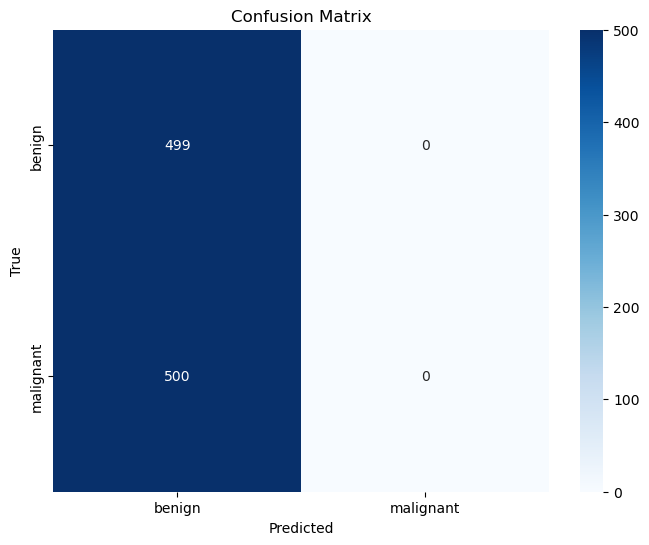

Classification Report:
              precision    recall  f1-score   support

      benign       0.50      1.00      0.67       499
   malignant       0.00      0.00      0.00       500

    accuracy                           0.50       999
   macro avg       0.25      0.50      0.33       999
weighted avg       0.25      0.50      0.33       999



In [22]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Predict the classes for the test data
predictions = model.predict(test_generator, steps=len(test_generator), verbose=1)

# Step 2: Convert predictions to class labels (assuming predictions are probabilities from softmax)
predicted_classes = np.argmax(predictions, axis=1)

# Step 3: Get true class labels
true_classes = test_generator.classes

# Step 4: Ensure that both arrays (true_classes and predicted_classes) have the same length
# If necessary, slice predictions or true_classes to match the length
if len(true_classes) != len(predicted_classes):
    true_classes = true_classes[:len(predicted_classes)]

# Step 5: Generate confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Step 6: Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Step 7: Print the classification report
print('Classification Report:')
print(classification_report(true_classes, predicted_classes, target_names=test_generator.class_indices.keys()))


### Grey ARgu + Original as input for CNN

In [23]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np
import warnings

# Suppress TensorFlow warnings (or any other unwanted warnings)
warnings.filterwarnings('ignore')


# Define the paths to the training and testing data
train_dir = r'C:\Users\HP\Downloads\Grey Arug + Ori'
test_dir =  r'C:\Users\HP\Downloads\Grey_images\Test'

# Create ImageDataGenerators for loading images without augmentation
train_datagen = ImageDataGenerator(rescale=1./255)  # Only rescale the images
test_datagen = ImageDataGenerator(rescale=1./255)

# Load the training and testing datasets
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),  # Resize the images
    batch_size=32,
    class_mode='binary'  # Since it's a binary classification (benign vs malignant)
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)



Found 27726 images belonging to 2 classes.
Found 999 images belonging to 2 classes.


In [24]:
# Build a simple CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary classification (benign vs malignant)
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])




In [25]:
# Train the model and save the training history
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,
    validation_data=test_generator,
    validation_steps=test_generator.samples // test_generator.batch_size
)



Epoch 1/10
866/866 ━━━━━━━━━━━━━━━━━━━━ 432s 447ms/step - accuracy: 0.7323 - loss: 0.5437 - val_accuracy: 0.8599 - val_loss: 0.3269
Epoch 2/10
866/866 ━━━━━━━━━━━━━━━━━━━━ 1s 165us/step - accuracy: 0.9688 - loss: 0.3216 - val_accuracy: 0.8571 - val_loss: 0.1836
Epoch 3/10
866/866 ━━━━━━━━━━━━━━━━━━━━ 430s 496ms/step - accuracy: 0.8150 - loss: 0.4055 - val_accuracy: 0.8931 - val_loss: 0.2795
Epoch 4/10
866/866 ━━━━━━━━━━━━━━━━━━━━ 1s 144us/step - accuracy: 0.7812 - loss: 0.3696 - val_accuracy: 0.8571 - val_loss: 0.2935
Epoch 5/10
866/866 ━━━━━━━━━━━━━━━━━━━━ 430s 497ms/step - accuracy: 0.8447 - loss: 0.3561 - val_accuracy: 0.8891 - val_loss: 0.2694
Epoch 6/10
866/866 ━━━━━━━━━━━━━━━━━━━━ 1s 140us/step - accuracy: 0.9062 - loss: 0.1607 - val_accuracy: 0.7143 - val_loss: 0.4793
Epoch 7/10
866/866 ━━━━━━━━━━━━━━━━━━━━ 430s 496ms/step - accuracy: 0.8670 - loss: 0.3107 - val_accuracy: 0.8871 - val_loss: 0.2534
Epoch 8/10
866/866 ━━━━━━━━━━━━━━━━━━━━ 1s 141us/step - accuracy: 0.8438 - loss: 0

32/32 - 5s - 146ms/step - accuracy: 0.8889 - loss: 0.2648
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 153ms/step


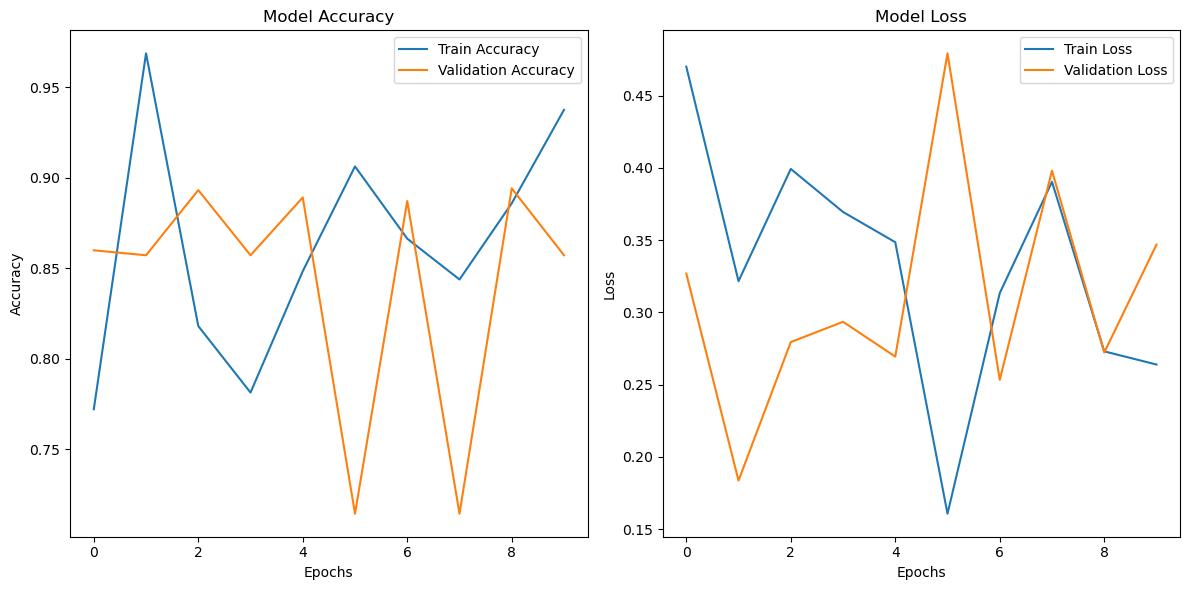

Test Accuracy: 0.8889


In [26]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator, verbose=2)

# Get predictions and true labels
test_generator.reset()  # Reset the generator to avoid issues with predict
y_pred = model.predict(test_generator, verbose=1)
y_pred = (y_pred > 0.5).astype("int32")  # Convert predictions to binary

# Get true labels
y_true = test_generator.classes


# Plotting graphs for training and validation accuracy & loss
# Accuracy Plot
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Print final test accuracy
print(f'Test Accuracy: {test_acc:.4f}')

32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 149ms/step


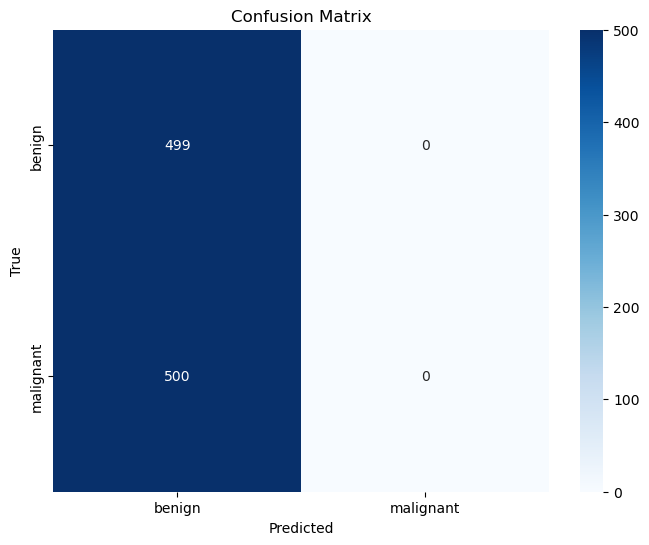

Classification Report:
              precision    recall  f1-score   support

      benign       0.50      1.00      0.67       499
   malignant       0.00      0.00      0.00       500

    accuracy                           0.50       999
   macro avg       0.25      0.50      0.33       999
weighted avg       0.25      0.50      0.33       999



In [27]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Predict the classes for the test data
predictions = model.predict(test_generator, steps=len(test_generator), verbose=1)

# Step 2: Convert predictions to class labels (assuming predictions are probabilities from softmax)
predicted_classes = np.argmax(predictions, axis=1)

# Step 3: Get true class labels
true_classes = test_generator.classes

# Step 4: Ensure that both arrays (true_classes and predicted_classes) have the same length
# If necessary, slice predictions or true_classes to match the length
if len(true_classes) != len(predicted_classes):
    true_classes = true_classes[:len(predicted_classes)]

# Step 5: Generate confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Step 6: Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Step 7: Print the classification report
print('Classification Report:')
print(classification_report(true_classes, predicted_classes, target_names=test_generator.class_indices.keys()))


## USING VGG16 MODEL

In [1]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import warnings

# Suppress TensorFlow warnings (or any other unwanted warnings)
warnings.filterwarnings('ignore')
# Define the paths to the training and testing data
train_dir = r'C:\Users\HP\Downloads\melanoma_cancer_dataset_without_duplicates\train'
test_dir =  r'C:\Users\HP\Downloads\melanoma_cancer_dataset_without_duplicates\test'

# Create ImageDataGenerators for loading images without augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,          # Rescale the images
    shear_range=0.2,         # Shearing transformation
    zoom_range=0.2,          # Zoom transformation
    horizontal_flip=True     # Random horizontal flip
)

test_datagen = ImageDataGenerator(rescale=1./255)  # Only rescale the images for testing

# Load the training and testing datasets
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),  # Resize the images
    batch_size=32,
    class_mode='binary'  # Binary classification (benign vs malignant)
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

# Load the pre-trained VGG16 model + add custom layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Freeze the convolutional base (we don't want to retrain VGG16's weights)
base_model.trainable = False

# Build the final model by adding custom layers on top of VGG16
model = models.Sequential([
    base_model,
    layers.Flatten(),  # Flatten the output of the convolutional base
    layers.Dense(512, activation='relu'),  # Fully connected layer
    layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model`
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,
    validation_data=test_generator,
    validation_steps=test_generator.samples // test_generator.batch_size
)

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test accuracy: {test_acc}")


Found 9579 images belonging to 2 classes.
Found 999 images belonging to 2 classes.
Epoch 1/10
299/299 ━━━━━━━━━━━━━━━━━━━━ 878s 3s/step - accuracy: 0.7935 - loss: 0.5468 - val_accuracy: 0.8931 - val_loss: 0.2736
Epoch 2/10
299/299 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9375 - loss: 0.2552 - val_accuracy: 0.8571 - val_loss: 0.1750
Epoch 3/10
299/299 ━━━━━━━━━━━━━━━━━━━━ 911s 3s/step - accuracy: 0.8858 - loss: 0.2698 - val_accuracy: 0.9012 - val_loss: 0.2424
Epoch 4/10
299/299 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9062 - loss: 0.2418 - val_accuracy: 1.0000 - val_loss: 0.0424
Epoch 5/10
299/299 ━━━━━━━━━━━━━━━━━━━━ 916s 3s/step - accuracy: 0.8953 - loss: 0.2435 - val_accuracy: 0.8901 - val_loss: 0.2564
Epoch 6/10
299/299 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8438 - loss: 0.4250 - val_accuracy: 0.8571 - val_loss: 0.2208
Epoch 7/10
299/299 ━━━━━━━━━━━━━━━━━━━━ 813s 3s/step - accuracy: 0.8991 - loss: 0.2437 - val_accuracy: 0.9073 - val_loss: 0.2242
Epoch 8/10
299/29

In [5]:
model.save('vgg-16-2.h5')
model.save('vgg-16-2.keras')

32/32 - 68s - 2s/step - accuracy: 0.8969 - loss: 0.2710
32/32 ━━━━━━━━━━━━━━━━━━━━ 80s 2s/step


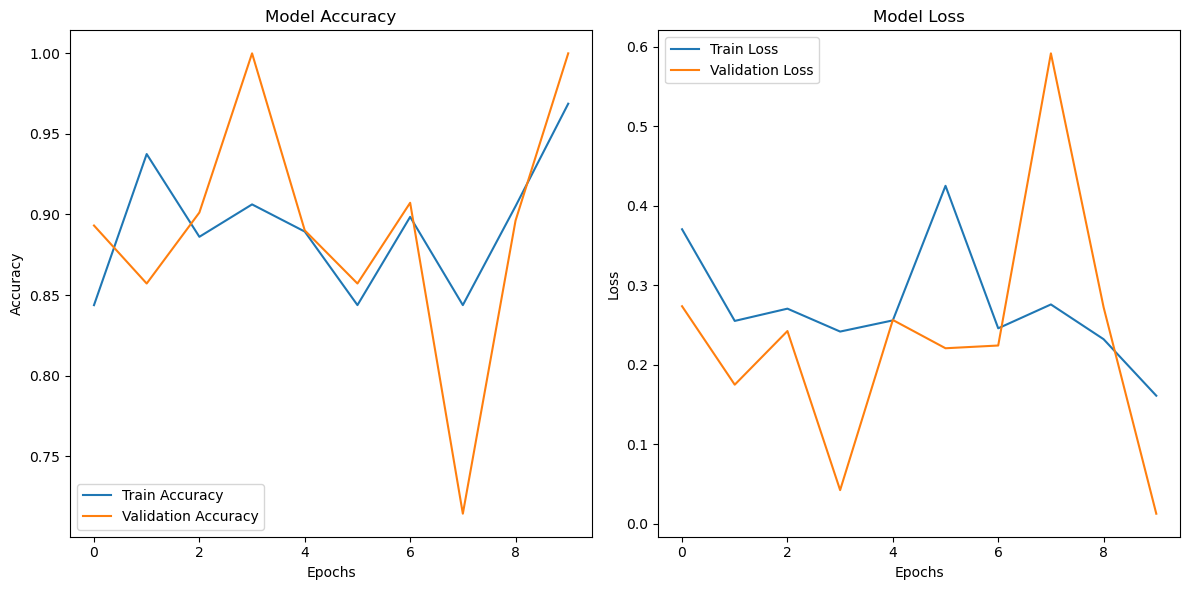

Test Accuracy: 0.8969


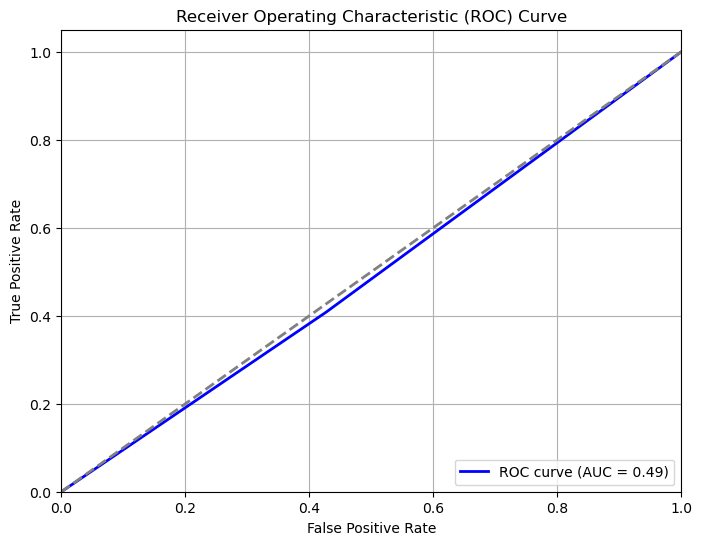

AUC: 0.4906


In [2]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import numpy as np
from tensorflow.keras.models import load_model

# 1. Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator, verbose=2)

# 2. Get predictions and true labels
test_generator.reset()  # Reset the generator to avoid issues with predict
y_pred = model.predict(test_generator, verbose=1)
y_pred = (y_pred > 0.5).astype("int32")  # Convert predictions to binary (0 or 1)

# Get true labels
y_true = test_generator.classes

# 3. Plotting graphs for training and validation accuracy & loss
# Accuracy Plot
plt.figure(figsize=(12, 6))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# 4. Print final test accuracy
print(f'Test Accuracy: {test_acc:.4f}')

# 5. Calculate and plot ROC curve
fpr, tpr, thresholds = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')  # Diagonal line (random classifier)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Optionally, print AUC score
print(f'AUC: {roc_auc:.4f}')


32/32 ━━━━━━━━━━━━━━━━━━━━ 84s 3s/step


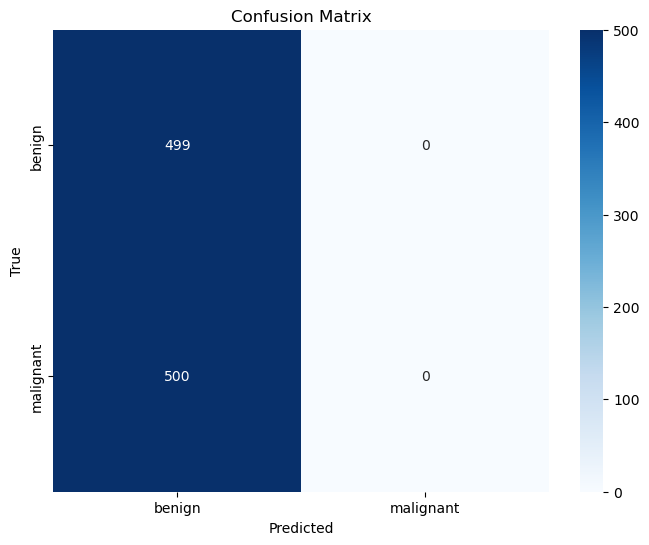

Classification Report:
              precision    recall  f1-score   support

      benign       0.50      1.00      0.67       499
   malignant       0.00      0.00      0.00       500

    accuracy                           0.50       999
   macro avg       0.25      0.50      0.33       999
weighted avg       0.25      0.50      0.33       999



In [38]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Predict the classes for the test data
predictions = model.predict(test_generator, steps=len(test_generator), verbose=1)

# Step 2: Convert predictions to class labels (assuming predictions are probabilities from softmax)
predicted_classes = np.argmax(predictions, axis=1)

# Step 3: Get true class labels
true_classes = test_generator.classes

# Step 4: Ensure that both arrays (true_classes and predicted_classes) have the same length
# If necessary, slice predictions or true_classes to match the length
if len(true_classes) != len(predicted_classes):
    true_classes = true_classes[:len(predicted_classes)]

# Step 5: Generate confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Step 6: Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Step 7: Print the classification report
print('Classification Report:')
print(classification_report(true_classes, predicted_classes, target_names=test_generator.class_indices.keys()))


## USING VGG19 MODEL:

Found 9579 images belonging to 2 classes.
Found 999 images belonging to 2 classes.
Epoch 1/10
299/299 ━━━━━━━━━━━━━━━━━━━━ 1074s 4s/step - accuracy: 0.8088 - loss: 0.5350 - val_accuracy: 0.8810 - val_loss: 0.2626
Epoch 2/10
299/299 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8438 - loss: 0.3010 - val_accuracy: 1.0000 - val_loss: 0.1374
Epoch 3/10
299/299 ━━━━━━━━━━━━━━━━━━━━ 1130s 4s/step - accuracy: 0.8971 - loss: 0.2474 - val_accuracy: 0.8881 - val_loss: 0.2908
Epoch 4/10
299/299 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 1.0000 - loss: 0.0828 - val_accuracy: 1.0000 - val_loss: 0.1295
Epoch 5/10
299/299 ━━━━━━━━━━━━━━━━━━━━ 1160s 4s/step - accuracy: 0.9004 - loss: 0.2338 - val_accuracy: 0.8891 - val_loss: 0.2672
Epoch 6/10
299/299 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8750 - loss: 0.2417 - val_accuracy: 1.0000 - val_loss: 0.1272
Epoch 7/10
299/299 ━━━━━━━━━━━━━━━━━━━━ 1161s 4s/step - accuracy: 0.9174 - loss: 0.2054 - val_accuracy: 0.8942 - val_loss: 0.2428
Epoch 8/10
29

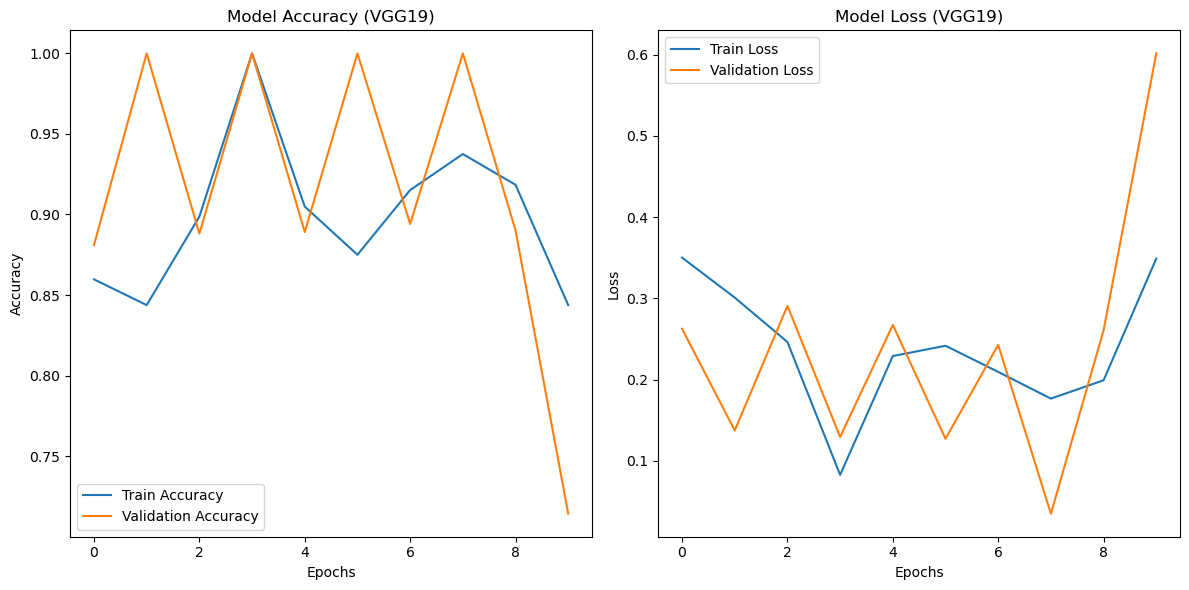

Test Accuracy: 0.8589


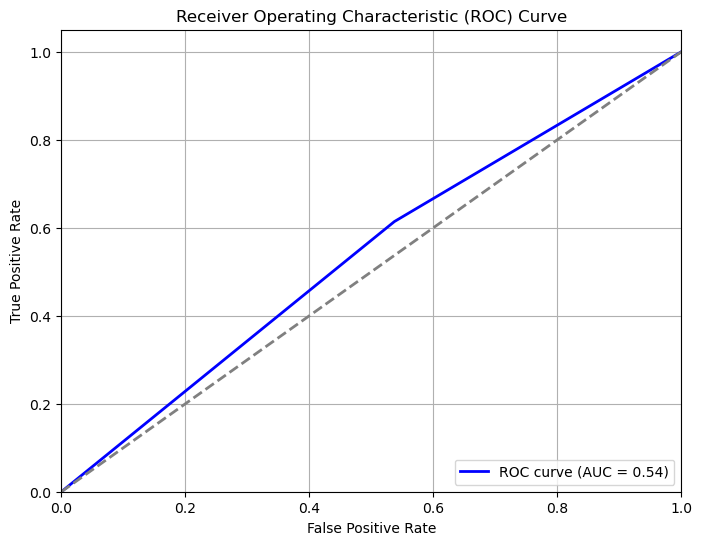

AUC: 0.5385


In [2]:
import matplotlib.pyplot as plt
from tensorflow.keras.applications import VGG19
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import roc_curve, auc
import numpy as np
import warnings

# Suppress TensorFlow warnings (or any other unwanted warnings)
warnings.filterwarnings('ignore')

# Define directories for training and testing data
train_dir = r'C:\Users\HP\Downloads\melanoma_cancer_dataset_without_duplicates\train'
test_dir = r'C:\Users\HP\Downloads\melanoma_cancer_dataset_without_duplicates\test'

# Create ImageDataGenerators for loading images without augmentation
train_datagen = ImageDataGenerator(rescale=1./255)  # Only rescale the images
test_datagen = ImageDataGenerator(rescale=1./255)

# Load the training and testing datasets
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),  # Resize the images
    batch_size=32,
    class_mode='binary'  # Binary classification (benign vs malignant)
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

# Load VGG19 with pre-trained weights and without the top layer
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Freeze the convolutional base to retain pre-trained features
base_model.trainable = False

# Build the model by adding custom layers on top of VGG19
model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary classification (benign vs malignant)
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,
    validation_data=test_generator,
    validation_steps=test_generator.samples // test_generator.batch_size
)

# 1. Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator, verbose=2)

# 2. Get predictions and true labels
test_generator.reset()  # Reset the generator to avoid issues with predict
y_pred = model.predict(test_generator, verbose=1)
y_pred = (y_pred > 0.5).astype("int32")  # Convert predictions to binary (0 or 1)

# Get true labels
y_true = test_generator.classes

# 3. Plotting graphs for training and validation accuracy & loss
# Accuracy Plot
plt.figure(figsize=(12, 6))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy (VGG19)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss (VGG19)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# 4. Print final test accuracy
print(f'Test Accuracy: {test_acc:.4f}')

# 5. Calculate and plot ROC curve
fpr, tpr, thresholds = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')  # Diagonal line (random classifier)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Optionally, print AUC score
print(f'AUC: {roc_auc:.4f}')


In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Predict the classes for the test data
predictions = model.predict(test_generator, steps=len(test_generator), verbose=1)

# Step 2: Convert predictions to class labels (assuming predictions are probabilities from softmax)
predicted_classes = np.argmax(predictions, axis=1)

# Step 3: Get true class labels
true_classes = test_generator.classes

# Step 4: Ensure that both arrays (true_classes and predicted_classes) have the same length
# If necessary, slice predictions or true_classes to match the length
if len(true_classes) != len(predicted_classes):
    true_classes = true_classes[:len(predicted_classes)]

# Step 5: Generate confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Step 6: Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Step 7: Print the classification report
print('Classification Report:')
print(classification_report(true_classes, predicted_classes, target_names=test_generator.class_indices.keys()))


In [3]:
import pandas as pd

# Data for the table
data = {
    "Approach": [
        "RGB, raw dataset (with duplicates)",
        "RGB, raw dataset (duplicates removed)",
        "Normalized and grayscale",
        "RGB + augmentation",
        "Grayscale + augmentation",
        "VGG16",
        "VGG19"
    ],
    "Accuracy": [
        0.8970,
        0.9039,
        0.8979,
        0.9069,
        0.8889,
        0.8969,
        0.8589
    ]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Display the table

df.style.set_caption("Approach vs Accuracy")  # Optionally add caption for styling in Notebook


,Approach,Accuracy
0,"RGB, raw dataset (with duplicates)",0.897000
1,"RGB, raw dataset (duplicates removed)",0.903900
2,Normalized and grayscale,0.897900
3,RGB + augmentation,0.906900
4,Grayscale + augmentation,0.888900
5,VGG16,0.896900
6,VGG19,0.858900
